# Partial Dependence Plot (PDP)

**Partial Dependence Plot (PDP)** {cite}`friedman2001greedy` is a
model-agnostic technique to generate model explanations for any
classification models. Unlike visual explanations generated by ANOVA and
VarImp that show only the importance of all features, visual
explanations generated by PDP illustrate the marginal effect that one or
two features have on the predicted outcome of a classification model.

## Tutorial

In [1]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd
# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

# Import for Construct a black-box model (Regression and Random Forests)
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

train_dataset = pd.read_csv(("../../../datasets/lucene-2.9.0.csv"), index_col = 'File')
test_dataset = pd.read_csv(("../../../datasets/lucene-3.0.0.csv"), index_col = 'File')

outcome = 'RealBug'
features = ['OWN_COMMIT', 'Added_lines', 'CountClassCoupled', 'AvgLine', 'RatioCommentToCode']

# process outcome to 0 and 1
train_dataset[outcome] = pd.Categorical(train_dataset[outcome])
train_dataset[outcome] = train_dataset[outcome].cat.codes

test_dataset[outcome] = pd.Categorical(test_dataset[outcome])
test_dataset[outcome] = test_dataset[outcome].cat.codes

X_train = train_dataset.loc[:, features]
X_test = test_dataset.loc[:, features]

y_train = train_dataset.loc[:, outcome]
y_test = test_dataset.loc[:, outcome]


# commits - # of commits that modify the file of interest
# Added lines - # of added lines of code
# Count class coupled - # of classes that interact or couple with the class of interest
# LOC - # of lines of code
# RatioCommentToCode - The ratio of lines of comments to lines of code
features = ['nCommit', 'AddedLOC', 'nCoupledClass', 'LOC', 'CommentToCodeRatio']

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

## Construct a black-box model (Random Forests)

# random forests
rf_model = RandomForestClassifier(random_state=1234, n_jobs = 10)
rf_model.fit(X_train, y_train)  

RandomForestClassifier(n_jobs=10, random_state=1234)

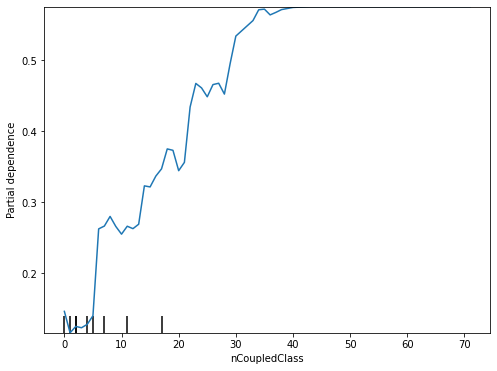

In [2]:
# Import for Partial Dependence Plot (PDP)
import subprocess
import sys
import importlib
import sklearn
from sklearn.inspection import plot_partial_dependence # new version
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_ylabel(ylabel = '', fontsize = 24)
ax.set_xlabel(xlabel = '', fontsize = 24)

# a visual example of PDP for the ActiveDevelopers (features[2])
plot_partial_dependence(estimator = rf_model, 
                        X = X_train, 
                        features = [2], 
                        feature_names = features, 
                        ax = ax)